In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data frames
dataset = pd.read_csv("Iris.csv")

In [3]:
#First five rows of the data frame
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Number of rows and columns in this data frame
dataset.shape

(150, 6)

In [5]:
#Cheaking for the missing values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Data Analysis statistical measures of the dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#count of Species 
Species_count = pd.DataFrame(dataset['Species'].value_counts())
Species_count

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


([<matplotlib.patches.Wedge at 0x1a6a8f17400>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')])

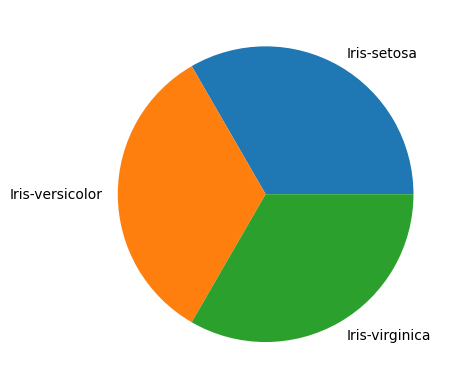

In [8]:
#attrition visualization
plt.pie(Species_count['Species'], labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] )

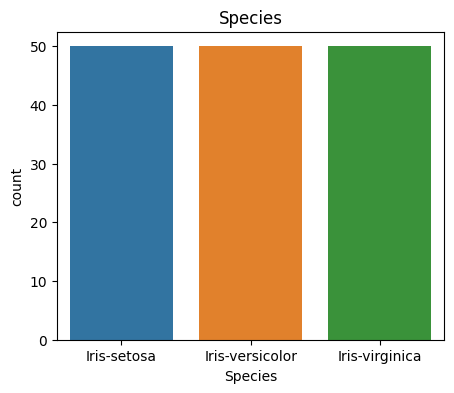

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'Species', data = dataset)
plt.title('Species')
plt.show()

In [10]:
#print all the data types and their unique values in the data set
for column in dataset.columns:
    if dataset[column].dtype == object:
        print(str(column) + ' : ' + str(dataset[column].unique())) 
        print(dataset[column].value_counts())
        print('__________________________________')

Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
__________________________________


C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_15628\1741860679.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot: >

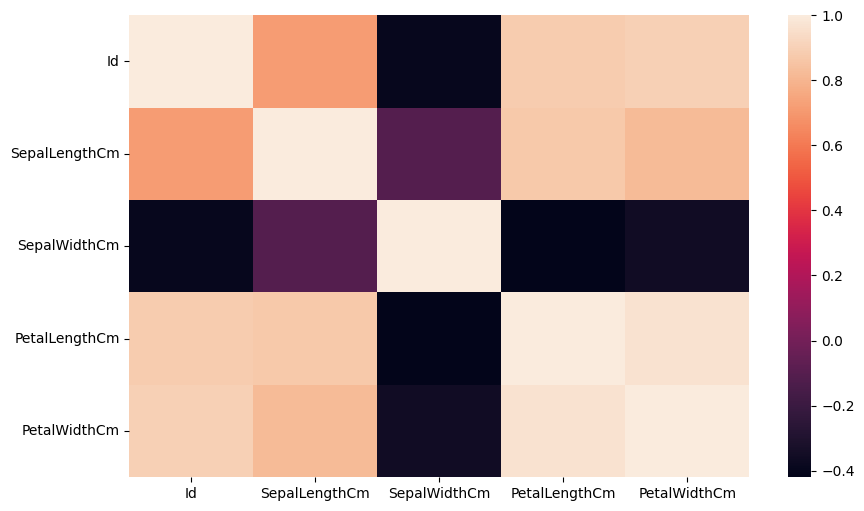

In [11]:
#visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr())

In [12]:
#correlation 
dataset.corr()

C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_15628\3315222725.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [13]:
dataset = dataset.drop([ 'Id'], axis = 1 )

In [14]:
#Encoding Species values
dataset.replace({'Species':{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X = dataset.drop(['Species'], axis = 1)
Y = dataset['Species']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size= 0.20, random_state=0)

In [17]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [18]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()


In [19]:
model_LR.fit(X_train, Y_train)

C:\Users\Vaishnavi Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
pred = model_LR.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_test, pred)

1.0

Accuracy Score is 100%

PREDICTION

In [23]:
input_data = np.array([3, 2, 1, 0.2])

#reshape the array
input_data_reshaped = input_data.reshape(1,-1)

prediction = model_LR.predict(input_data_reshaped)

if prediction == 0:
    print("The Prediction of Species is: Iris-setosa")
elif prediction == 1:
    print("The Prediction of Species is: Iris-versicolor")
else:
    print("The Prediction of Species is: Iris-virginica")    

The Prediction of Species is: Iris-setosa


C:\Users\Vaishnavi Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
